#**Градиентный бустинг для регрессии. Контрольное задание**

# **1. Подготовка исходных данных**

Сгенерировать исходные данные для обучения модели градиентного бустинга.

Значения параметров выбираются из таблицы "Варианты".docx в соответствие с номером студента в списке группы в СДО.

In [1]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples = 942,
                       n_features = 2,
                       n_informative = 1,
                       noise = 10.3,
                       random_state = 10)

Разделить выборку на тренировочную и тестовую.

Использовать параметр `random_state` в соответствие со своим вариантом.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 10)
X_train.shape, X_test.shape

((753, 2), (189, 2))

Произвести масштабирование значений признаков.

In [5]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()

X_train = mm_scaler.fit_transform(X_train)
X_test = mm_scaler.fit_transform(X_test)
X_train

array([[0.61251819, 0.70736838],
       [0.32323907, 0.67880705],
       [0.83695566, 0.41505753],
       ...,
       [0.55794688, 0.42151034],
       [0.61773849, 0.672879  ],
       [0.599039  , 0.74358152]])

# **2. Обучение модели с гиперпараметрами по умолчанию**

Обучить модель.

In [7]:
from sklearn.ensemble import GradientBoostingRegressor
gb_default = GradientBoostingRegressor()

gb_default.fit(X_train, y_train)

GradientBoostingRegressor()

Оценить качество модели.

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_train_d = gb_default.predict(X_train)
y_pred_test_d = gb_default.predict(X_test)

mse_train_d = mean_squared_error(y_train, y_pred_train_d)
r2_train_d = r2_score(y_train, y_pred_train_d)

mse_test_d = mean_squared_error(y_test, y_pred_test_d)
r2_test_d = r2_score(y_test, y_pred_test_d)

print(f'Обучающая выборка MSE: {mse_train_d:.2f}, R2: {r2_train_d:.2f}')
print(f'Тестовая выборка MSE: {mse_test_d:.2f}, R2: {r2_test_d:.2f} ')

Обучающая выборка MSE: 65.72, R2: 0.99
Тестовая выборка MSE: 2489.25, R2: 0.49 


# **3. Подбор оптимальных гиперпараметров модели**

Осуществить подбор оптимальных гиперпараметров модели следующими способами:
- визуальный анализ зависимости метрик качества гиперпараметров на обучающей и тестовой выборках;
- визуальный анализ валидационных кривых;
- поиск на сетке.

In [15]:
import numpy as np
import matplotlib.pyplot as plt

### learning_rate

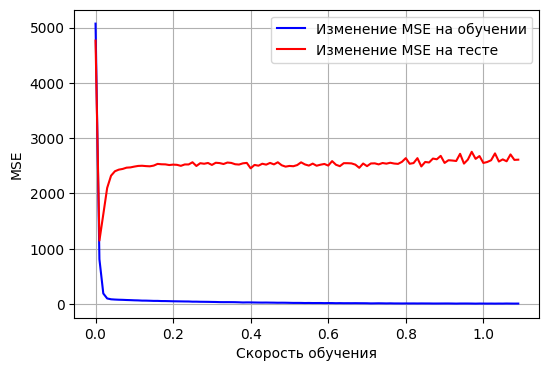

In [16]:
mse_train_l = []
mse_test_l = []

for param in np.arange(0.0001, 1.1, 0.01):
    gb = GradientBoostingRegressor(learning_rate = param)
    gb.fit(X_train, y_train)
    y_pred_train = gb.predict(X_train)
    y_pred_test = gb.predict(X_test)

    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)

    mse_train_l.append(mse_train)
    mse_test_l.append(mse_test)

fig = plt.figure(figsize = (6, 4))
plt.plot(np.arange(0.0001, 1.1, 0.01), mse_train_l, 'b-', label = "Изменение MSE на обучении")
plt.plot(np.arange(0.0001, 1.1, 0.01), mse_test_l, 'r-', label = "Изменение MSE на тесте")
plt.legend()
plt.xlabel('Скорость обучения')
plt.ylabel('MSE')
plt.grid()

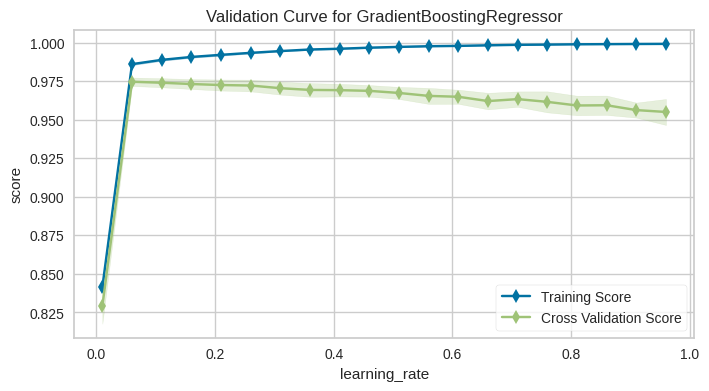

In [26]:
from yellowbrick.model_selection import ValidationCurve
viz_lr = ValidationCurve(
    GradientBoostingRegressor(random_state = 10),
    param_name = 'learning_rate',
    param_range = np.arange(0.01, 1, 0.05),
    cv = 5,
    scoring = 'r2',
    size = (800, 400),
    n_jobs = -1
)

viz_lr.fit(X_train, y_train)
viz_lr.show();

In [22]:
from sklearn.model_selection import GridSearchCV

gb = GradientBoostingRegressor()
param_grid = {'learning_rate': np.arange(0.0001, 1.1, 0.01)}
grid_search = GridSearchCV(gb, param_grid, cv = 5)

grid_search.fit(X_train, y_train)

optimal_lr = grid_search.best_params_['learning_rate']
print(f"Оптимальное значение скорости обучения: {optimal_lr:.3f}")

Оптимальное значение скорости обучения: 0.050


### n_estimators

In [31]:
gb = GradientBoostingRegressor(n_estimators = 100)
gb.fit(X_train, y_train)

GradientBoostingRegressor()

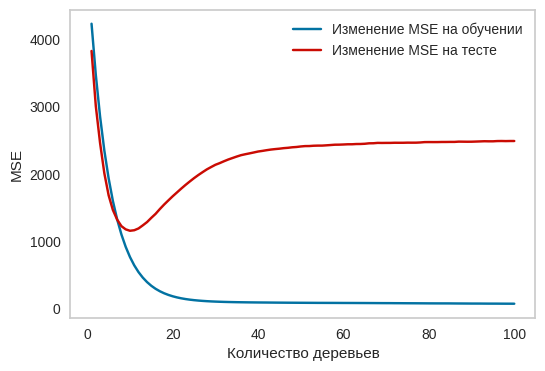

In [32]:
l_test_score = []
for _, y_pred in enumerate(gb.staged_predict(X_test)):
  test_score = mean_squared_error(y_test, y_pred)
  l_test_score.append(test_score)

fig = plt.figure(figsize = (6,4))

plt.plot(np.arange(100) + 1, gb.train_score_, 'b-',
label = 'Изменение MSE на обучении')

plt.plot(np.arange(100) + 1, l_test_score, 'r-',
         label = 'Изменение MSE на тесте')

plt.legend(loc = 'upper right')
plt.xlabel('Количество деревьев')
plt.ylabel('MSE')
plt.grid()

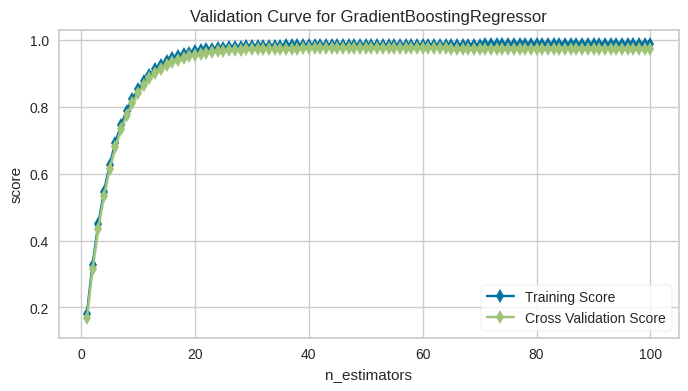

In [28]:
viz_ne = ValidationCurve(
    GradientBoostingRegressor(random_state = 10),
    param_name = 'n_estimators',
    param_range = np.arange(1, 101, 1),
    cv = 5,
    scoring = 'r2',
    size = (800, 400),
    n_jobs = -1
)

viz_ne.fit(X_train, y_train)
viz_ne.show();

In [33]:
gb = GradientBoostingRegressor()
param_grid = {'n_estimators': np.arange(1, 101, 1)}
grid_search = GridSearchCV(gb, param_grid, cv = 5)

grid_search.fit(X_train, y_train)

optimal_ne = grid_search.best_params_['n_estimators']
print(f"Оптимальное значение количества деревьев: {optimal_ne:.3f}")

Оптимальное значение количества деревьев: 53.000


### max_depth

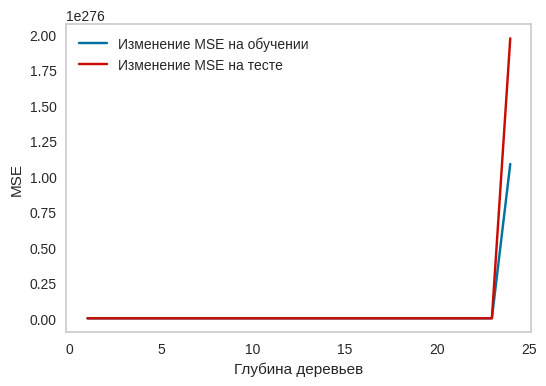

In [34]:
mse_train_l = []
mse_test_l = []

for param in np.arange(1, 25):
    gb = GradientBoostingRegressor(learning_rate = param)
    gb.fit(X_train, y_train)
    y_pred_train = gb.predict(X_train)
    y_pred_test = gb.predict(X_test)

    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)

    mse_train_l.append(mse_train)
    mse_test_l.append(mse_test)

fig = plt.figure(figsize = (6, 4))
plt.plot(np.arange(1, 25), mse_train_l, 'b-', label = "Изменение MSE на обучении")
plt.plot(np.arange(1, 25), mse_test_l, 'r-', label = "Изменение MSE на тесте")
plt.legend()
plt.xlabel('Глубина деревьев')
plt.ylabel('MSE')
plt.grid()

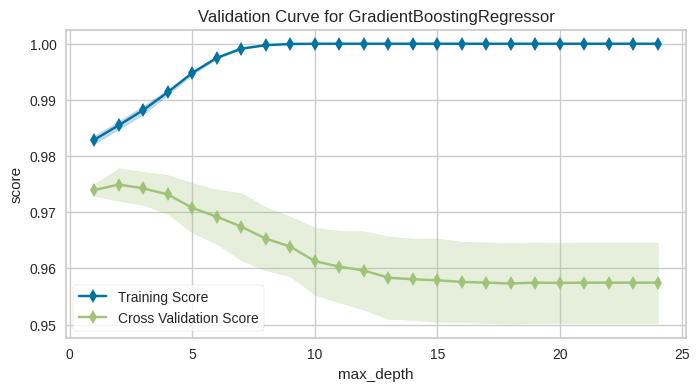

In [29]:
viz_md = ValidationCurve(
    GradientBoostingRegressor(random_state = 10),
    param_name = 'max_depth',
    param_range = np.arange(1, 25, 1),
    cv = 5,
    scoring = 'r2',
    size = (800, 400),
    n_jobs = -1
)

viz_md.fit(X_train, y_train)
viz_md.show();

In [39]:
gb = GradientBoostingRegressor()
param_grid = {'max_depth': np.arange(1, 25, 2)}
grid_search = GridSearchCV(gb, param_grid, cv = 5)

grid_search.fit(X_train, y_train)

optimal_md = grid_search.best_params_['max_depth']
print(f"Оптимальное глубина деревьев: {optimal_md}")

Оптимальное глубина деревьев: 3


### max_leaf_nodes

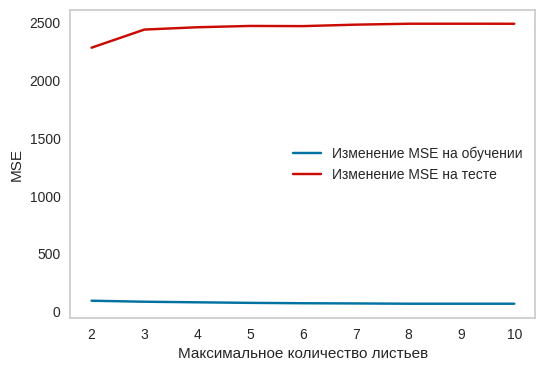

In [44]:
mse_train_l = []
mse_test_l = []

for param in np.arange(2, 11):
    gb = GradientBoostingRegressor(max_leaf_nodes = param)
    gb.fit(X_train, y_train)
    y_pred_train = gb.predict(X_train)
    y_pred_test = gb.predict(X_test)

    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)

    mse_train_l.append(mse_train)
    mse_test_l.append(mse_test)

fig = plt.figure(figsize = (6, 4))
plt.plot(np.arange(2, 11), mse_train_l, 'b-', label = "Изменение MSE на обучении")
plt.plot(np.arange(2, 11), mse_test_l, 'r-', label = "Изменение MSE на тесте")
plt.legend()
plt.xlabel('Максимальное количество листьев')
plt.ylabel('MSE')
plt.grid();

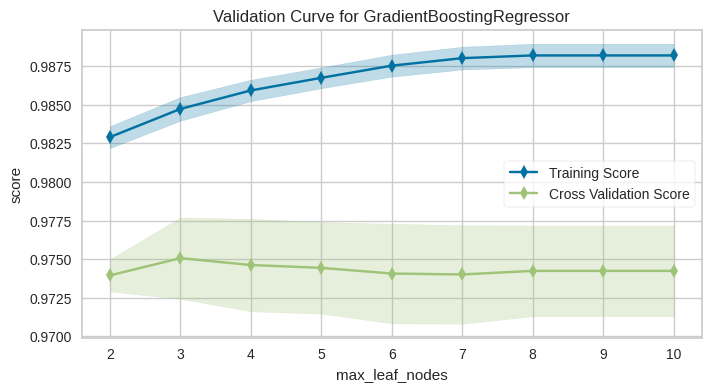

In [30]:
from yellowbrick.model_selection import ValidationCurve
viz_mln = ValidationCurve(
    GradientBoostingRegressor(random_state = 10),
    param_name = 'max_leaf_nodes',
    param_range = np.arange(1, 11, 1),
    cv = 5,
    scoring = 'r2',
    size = (800, 400),
    n_jobs = -1
)

viz_mln.fit(X_train, y_train)
viz_mln.show();

In [45]:
gb = GradientBoostingRegressor()
param_grid = {'max_leaf_nodes': np.arange(2, 11, 1)}
grid_search = GridSearchCV(gb, param_grid, cv = 5)

grid_search.fit(X_train, y_train)

optimal_mln = grid_search.best_params_['max_leaf_nodes']
print(f"Оптимальное максимальное количество листьев: {optimal_mln}")

Оптимальное глубина деревьев: 3


## Обучение модели

Обучить модель с найденными оптимальными значениями гиперпараметров.

In [53]:
gb_f = GradientBoostingRegressor(learning_rate = 0.05,
                               n_estimators = 53,
                               max_depth = 3,
                               max_leaf_nodes = 3)
gb_f.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_leaf_nodes=3, n_estimators=53)

Вывести предсказанные значения целевого признака.

In [54]:
X_new = [[0.4, -0.03]]
y_new = gb_f.predict(X_new)
y_new

array([-59.1236737])

## Оценивание качества модели

Вычислить среднюю квадратическую ошибку и коэффициент детерминации для данных обучающей и тестовой выборок.

In [55]:
y_pred_train_f = gb_f.predict(X_train)
y_pred_test_f = gb_f.predict(X_test)

mse_train_f = mean_squared_error(y_train, y_pred_train_f)
r2_train_f = r2_score(y_train, y_pred_train_f)

mse_test_f = mean_squared_error(y_test, y_pred_test_f)
r2_test_f = r2_score(y_test, y_pred_test_f)

print(f'Обучающая выборка MSE: {mse_train_f:.2f}, R2: {r2_train_f:.2f}')
print(f'Тестовая выборка MSE: {mse_test_f:.2f}, R2: {r2_test_f:.2f} ')

Обучающая выборка MSE: 230.00, R2: 0.96
Тестовая выборка MSE: 1615.69, R2: 0.67 
